In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generate artificial linear data
linear_X, linear_y = make_regression(n_samples=506, n_features=13, noise=75, random_state=46)

# Set feature names for the dataset
linear_feature_names = ['X'+str(feature+1) for feature in range(linear_X.shape[1])]

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(linear_X, linear_y)

# Define the function to check multicollinearity
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


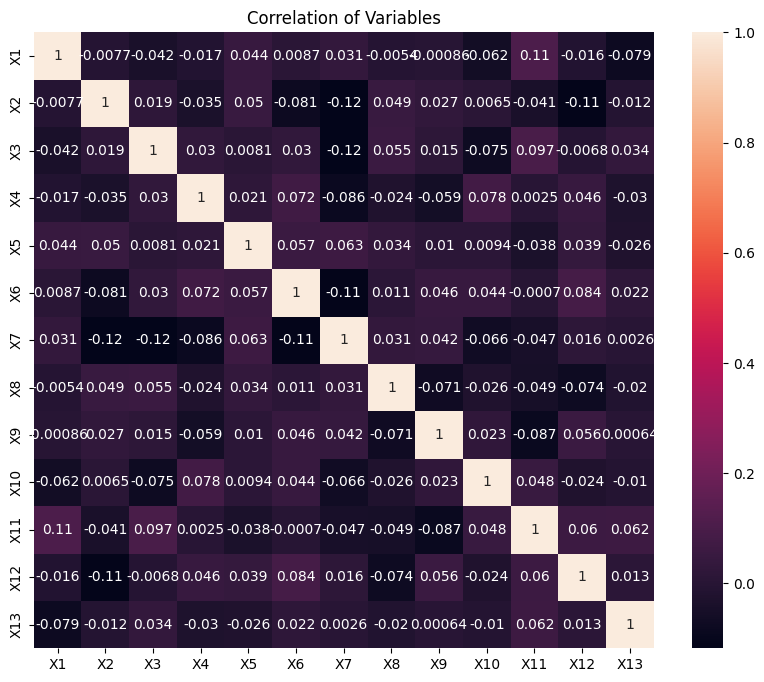

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 1.0309311702971027
X2: 1.0457176802992108
X3: 1.0418076962011933
X4: 1.0269600632251448
X5: 1.0199882018822788
X6: 1.0404194675991594
X7: 1.0670847781889186
X8: 1.0229686036798158
X9: 1.0292923730360835
X10: 1.0289003332516535
X11: 1.0520432208216244
X12: 1.0336719449364802
X13: 1.0140788728975827

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [6]:
multicollinearity_assumption(linear_model, linear_X, linear_y, linear_feature_names)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10516\2210060742.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  boston = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)


Assumption 3: Little to no multicollinearity among predictors


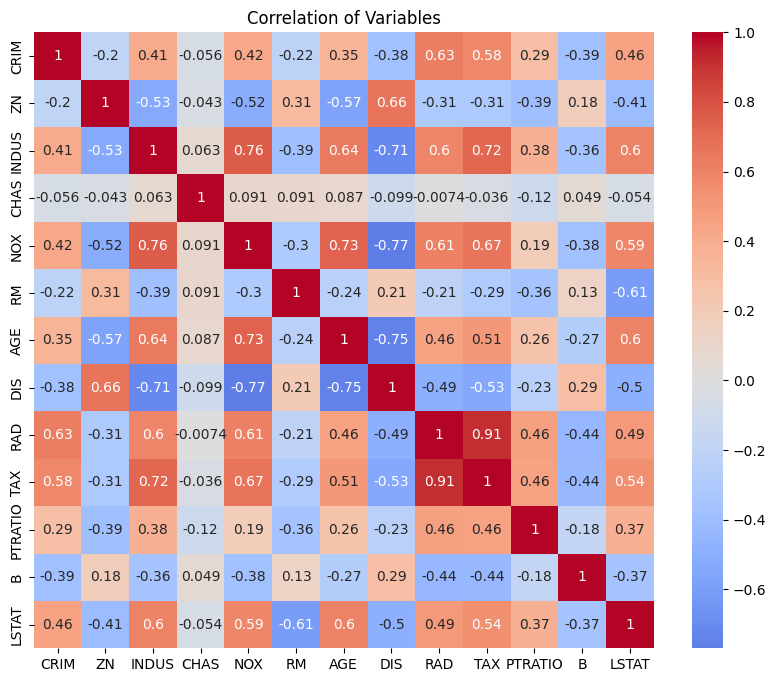

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
CRIM: 2.1003728199615233
ZN: 2.8440132669462637
INDUS: 14.485757706539308
CHAS: 1.1529518589418777
NOX: 73.89494652814788
RM: 77.94828304638538
AGE: 21.38685048994314
DIS: 14.6996523837492
RAD: 15.167724857920897
TAX: 61.227274009649456
PTRATIO: 85.02954731061801
B: 20.104942636229136
LSTAT: 11.102024772203539

10 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load Boston housing dataset from a CSV file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
    'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
boston = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)

# Separate features and target
boston_data = boston.drop('MEDV', axis=1)
boston_target = boston['MEDV']
boston_feature_names = boston_data.columns

# Fit a linear regression model
boston_model = LinearRegression()
boston_model.fit(boston_data, boston_target)
    
# Define the function to check multicollinearity
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove predictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction.
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    print('Assumption 3: Little to no multicollinearity among predictors')
    
    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation of Variables')
    plt.show()
    
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
    
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
    
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()
    
    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')
    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

# Call the function with the Boston dataset
multicollinearity_assumption(boston_model, boston_data, boston_target, boston_feature_names)
